In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
file = os.getcwd() + "\\BEST RESULTS\\results2\\output.csv"
df = pd.read_csv(file)
df.info()

df_scaled = df.drop(["Unnamed: 0", "date", "borough", "cluster"], axis=1)
cols = df_scaled.columns.values
df_scaled = StandardScaler().fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=cols)

df_scaled["borough"] = df["borough"]
df_scaled["cluster"] = df["cluster"]

df_std = df_scaled.drop("borough", axis=1)
labels = [df["cluster"]]
len(labels)

file = os.getcwd() + "\\data\\ResampledDataForEDA.csv"
X = pd.read_csv(file)
X['cluster'] = df["cluster"]

cluster1_df = X.loc[df['cluster'] == 0]
cluster2_df = X.loc[df['cluster'] == 1]
df_std['cluster'] = df["cluster"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35784 non-null  int64  
 1   nox         35784 non-null  float64
 2   no2         35784 non-null  float64
 3   no          35784 non-null  float64
 4   o3          35784 non-null  float64
 5   pm10        35784 non-null  float64
 6   pm2.5       35784 non-null  float64
 7   ws          35784 non-null  float64
 8   wd          35784 non-null  float64
 9   air_temp    35784 non-null  float64
 10  date        35784 non-null  object 
 11  borough     35784 non-null  object 
 12  cluster     35784 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 3.5+ MB


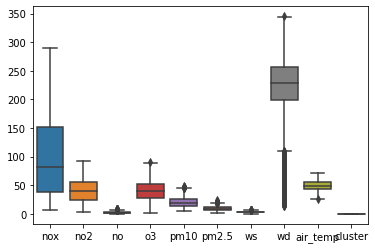

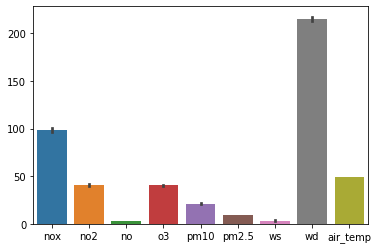

In [2]:
import seaborn as sns
sns.boxplot(data=cluster1_df)
plt.show()

sns.barplot(data=cluster1_df.drop("cluster", axis=1))
plt.show()

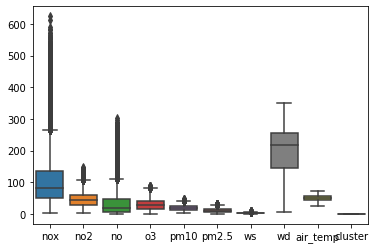

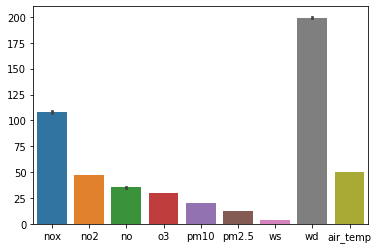

In [3]:
sns.boxplot(data=cluster2_df)
plt.show()

sns.barplot(data=cluster2_df.drop("cluster", axis=1))
plt.show()

<AxesSubplot:title={'center':'Cardinality'}, xlabel='Cluster Label', ylabel='Points in Cluster'>

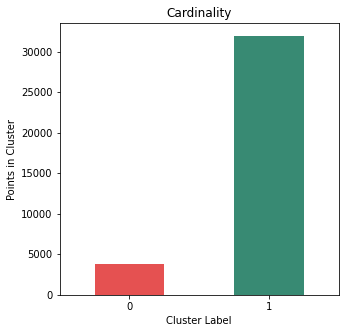

In [4]:
from ds_utils.unsupervised import plot_cluster_cardinality
import matplotlib.pyplot as plt

cluster_colors = ["#e55151", "#388a73", "#4c516d", "#ff9738", "#bec339", "#aa9988"]
fig, ax = plt.subplots(1,1,figsize=(5,5))

plot_cluster_cardinality(labels,
                         ax=ax,
                         title="Cardinality",
                         color=cluster_colors
                        )

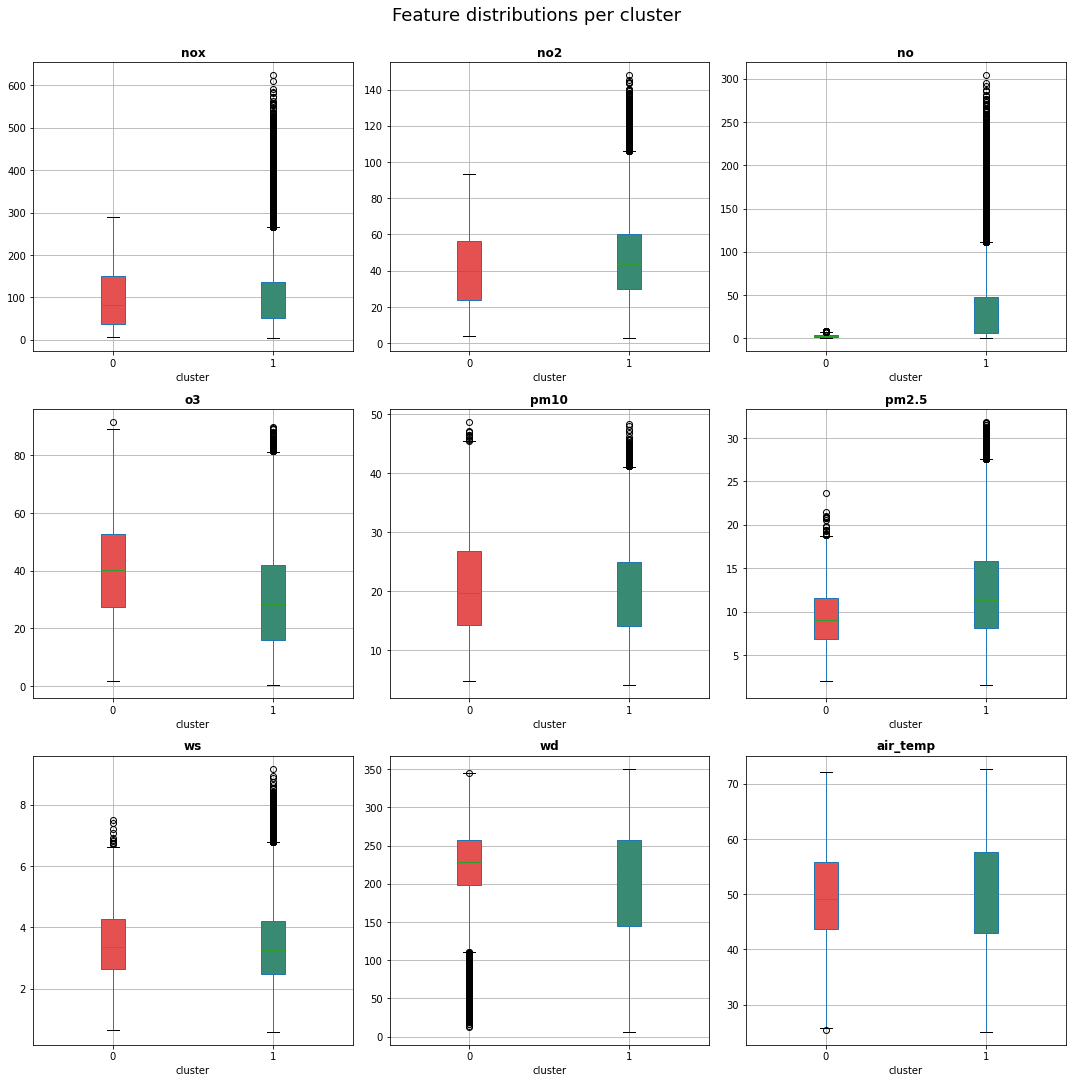

In [5]:
features = ["nox", "no2", "no", "o3", "pm10", "pm2.5", "ws", "wd", "air_temp"]
ncols = 3
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = X[[feature, 'cluster']].boxplot(by='cluster',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.iteritems():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=14, y=1)
plt.tight_layout()
plt.show()

In [6]:
X_mean = pd.concat([pd.DataFrame(X.mean().drop('cluster'), columns=['mean']),
                   X.groupby('cluster').mean().T], axis=1)

X_dev_rel = X_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel.drop(columns=['mean'], inplace=True)
X_mean.drop(columns=['mean'], inplace=True)

df_std_mean = pd.concat([pd.DataFrame(df_std.mean().drop('cluster'), columns=['mean']),
                   df_std.groupby('cluster').mean().T], axis=1)

df_std_dev_rel = df_std_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
df_std_dev_rel.drop(columns=['mean'], inplace=True)
df_std_mean.drop(columns=['mean'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3176\254017704.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_mean = pd.concat([pd.DataFrame(X.mean().drop('cluster'), columns=['mean']),


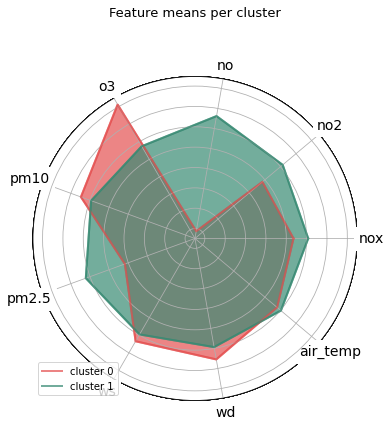

In [7]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])

        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

fig = plt.figure(figsize=(5, 5))
no_features = len(features)
radar = Radar(fig, features, np.unique(labels))

for k in range(0,2):
    cluster_data = df_std_mean[k].values.tolist()
    radar.plot(cluster_data,  '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Feature means per cluster", size=13, pad=60)
plt.show()

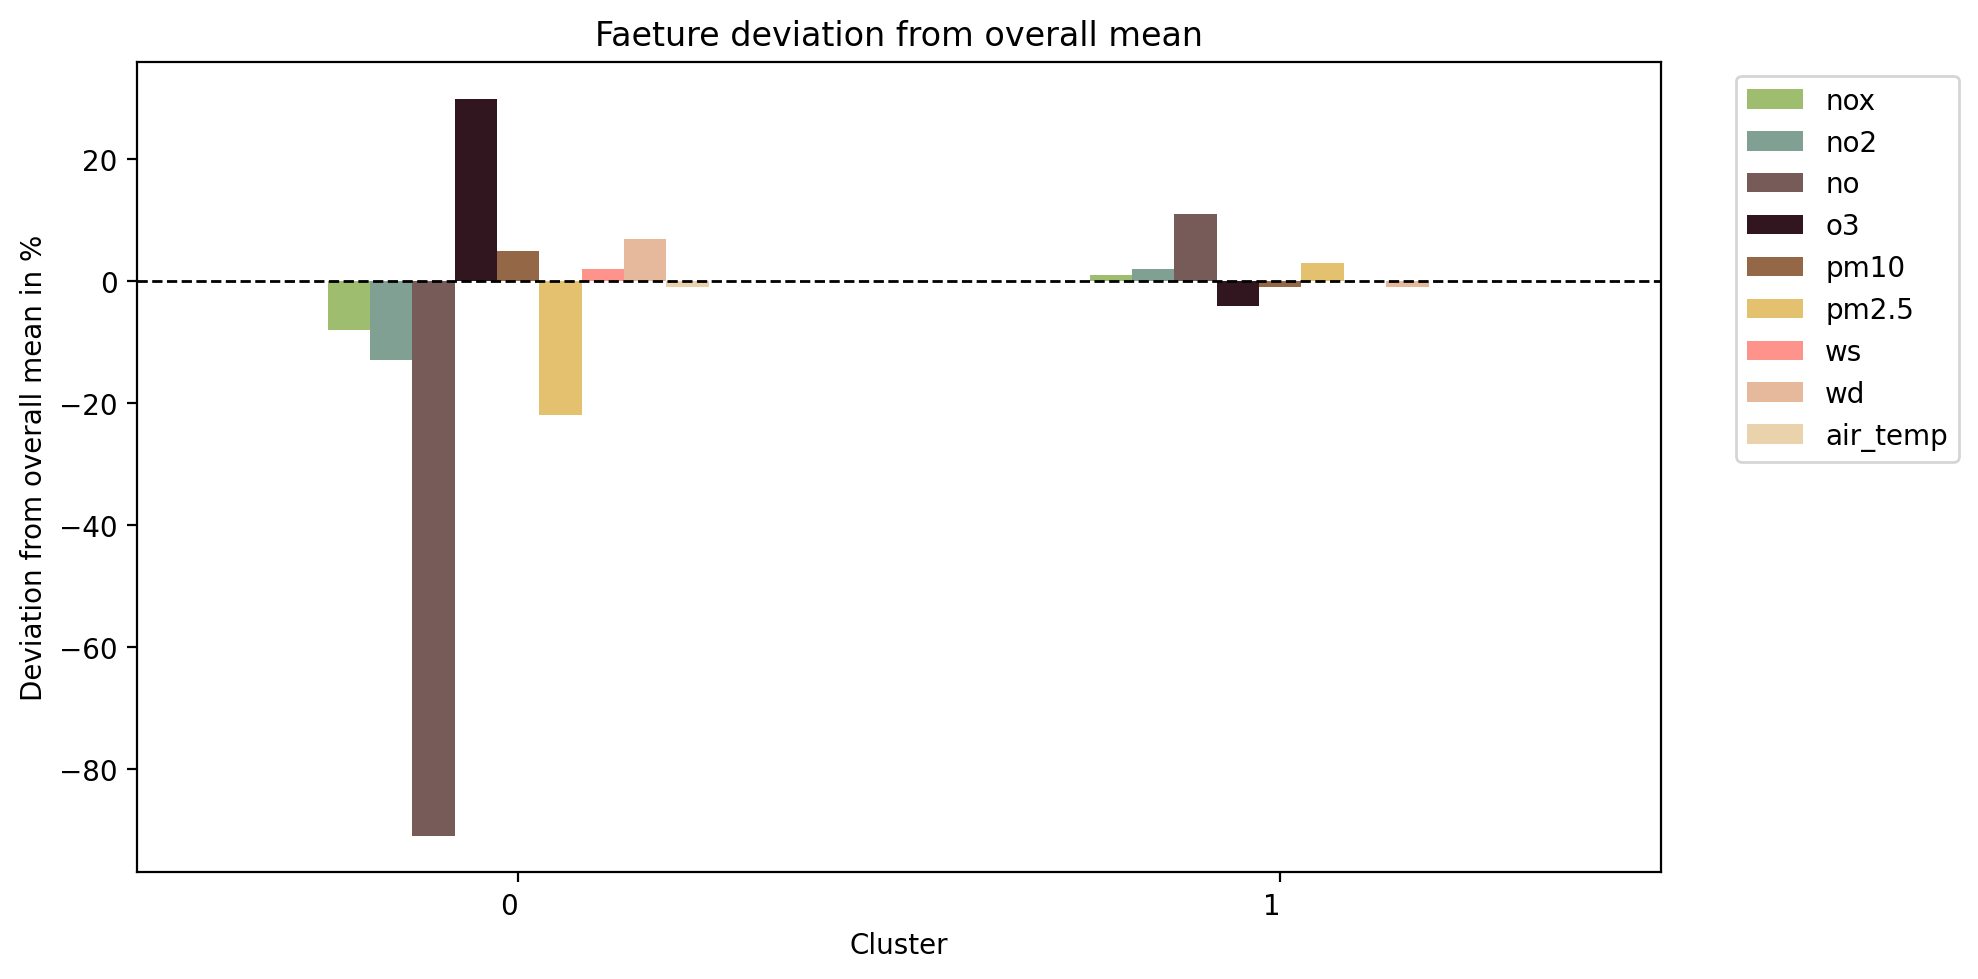

In [8]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
X_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="Faeture deviation from overall mean",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='epoch', ylabel='loss'>

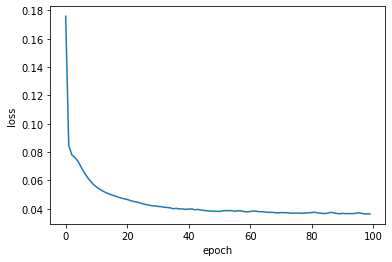

In [9]:
file = os.getcwd() + "\\BEST RESULTS\\results5\\pretrain_log.csv"
csv_data = pd.read_csv(file)

sns.lineplot(data=csv_data, x="epoch", y="loss", markers=True)

    iter  sh_score     ch_score  db_score      loss
0     50   0.49907  31393.70448   0.93690  0.009340
1    100   0.49987  31492.66637   0.92973  0.063270
2    150   0.49463  30928.77104   0.95340  0.011150
3    200   0.47276  28908.79940   1.01691  0.021690
4    250   0.49355  30639.48350   0.95896  0.022560
5    300   0.49548  30819.76094   0.95277  0.022670
6    350   0.48356  29705.33077   0.98896  0.022930
7    400   0.48829  30220.79387   0.97253  0.034020
8    450   0.48132  29528.13799   0.99278  0.022180
9    500   0.48108  29515.82226   0.99328  0.041050
10   550   0.49331  30549.17659   0.95933  0.021080
11   600   0.48888  30154.44526   0.97241  0.005870
12   650   0.49292  30506.09850   0.96030  0.029160
13   700   0.49312  30518.99931   0.95922  0.026670
14   750   0.48028  29021.52440   1.00053  0.019370
15   800   0.48499  29417.30738   0.98750  0.024850
16   850   0.48764  29647.20749   0.97984  0.018670
17   900   0.48268  29209.02934   0.99373  0.018810
18   950   0

<AxesSubplot:xlabel='iter', ylabel='loss'>

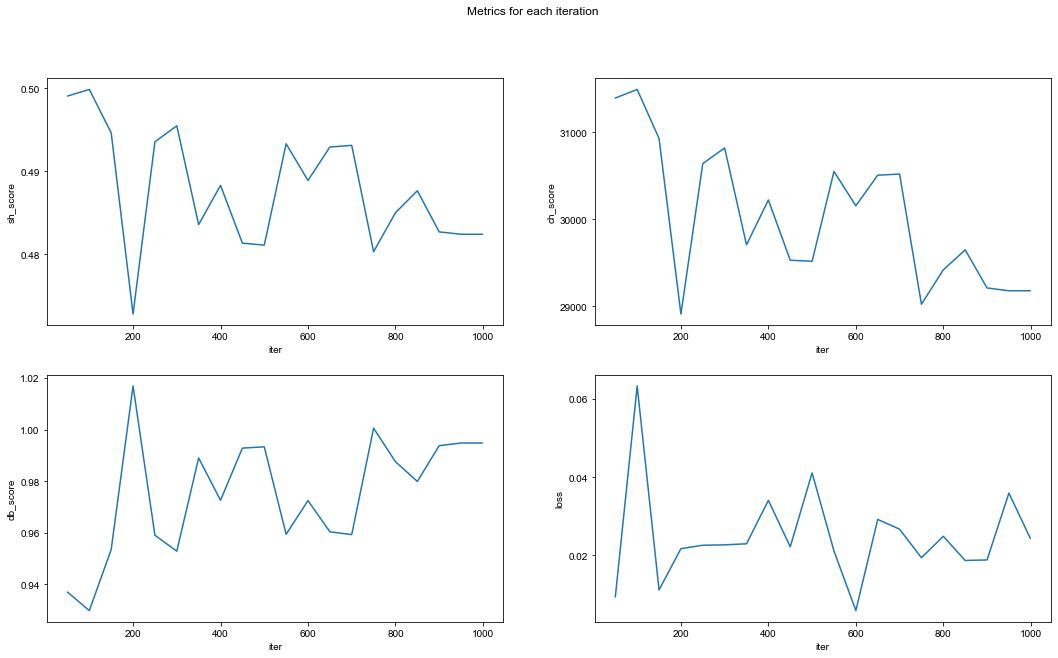

In [10]:
file = os.getcwd() + "\\BEST RESULTS\\results5\\dec_log.csv"
csv_data = pd.read_csv(file)
print(csv_data)

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Metrics for each iteration')
sns.set(font_scale = 2)
sns.lineplot(ax=axes[0, 0], data=csv_data, x='iter', y='sh_score')
sns.lineplot(ax=axes[0, 1], data=csv_data, x='iter', y='ch_score')
sns.lineplot(ax=axes[1, 0], data=csv_data, x='iter', y='db_score')
sns.lineplot(ax=axes[1, 1], data=csv_data, x='iter', y='loss')


<AxesSubplot:>

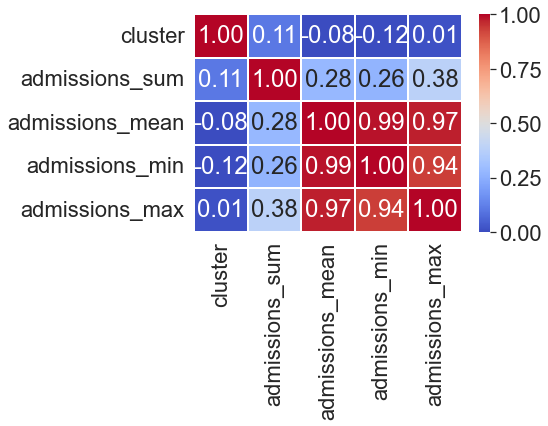

In [47]:
file = os.getcwd() + "\\data\\compare.csv"
df = pd.read_csv(file)
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

<AxesSubplot:>

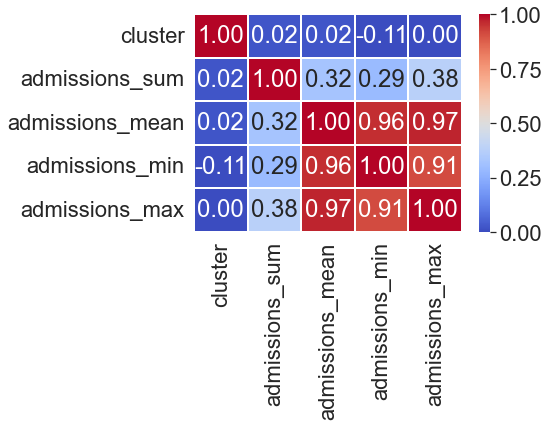

In [48]:
corr = df.corr(method ='spearman')
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

<AxesSubplot:>

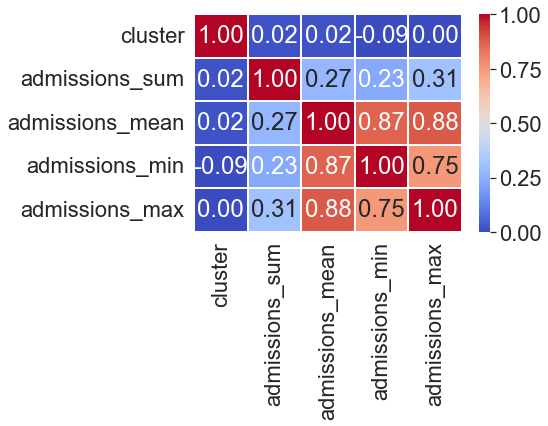

In [49]:
corr = df.corr(method ='kendall')
sns.heatmap(corr, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm')

c:\users\user\venv\lib\site-packages\dcor\_fast_dcov_avl.py:492: UserWarning: Falling back to uncompiled AVL fast distance covariance because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
c:\users\user\venv\lib\site-packages\dcor\_fast_dcov_avl.py:492: UserWarning: Falling back to uncompiled AVL fast distance covariance because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
c:\users\user\venv\lib\site-packages\dcor\_fast_dcov_avl.py:492: UserWarning: Falling back to uncompiled AVL fast distance covariance because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. R

<AxesSubplot:>

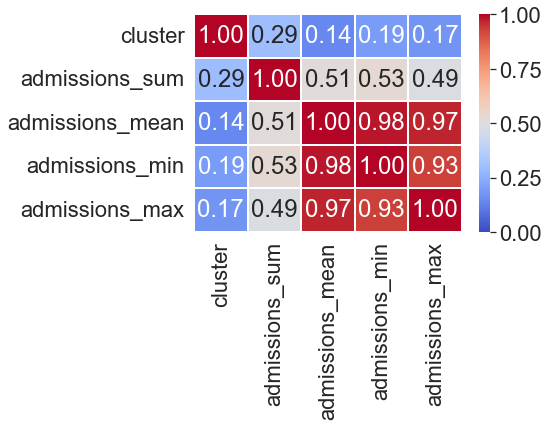

In [50]:
import dcor
data = df.drop("borough", axis=1)
cols = data.columns.values
n = len(cols)
centered = [ [0]*n for i in range(n)]
for i in range(n):
    for j in range(n):
        X = data[cols[i]]
        Y = data[cols[j]]
        centered[i][j] = dcor.distance_correlation(X, Y)

sns.heatmap(centered, annot=True, linewidths=.1, fmt="0.2f", vmin=0, vmax=1, cmap='coolwarm', xticklabels=cols, yticklabels=cols)

In [ ]:
from scipy.stats import f_oneway
F, p = f_oneway(df[df.cluster==0].admissions_mean,
                      df[df.cluster==1].admissions_mean)
print('F-Score for Anova is: ', F)
print('P-Value for Anova is: ', p)

In [53]:
from scipy.stats import pearsonr
res = pearsonr(df.cluster, df.admissions_mean)
res

(-0.07865114520216712, 0.7892677835954177)

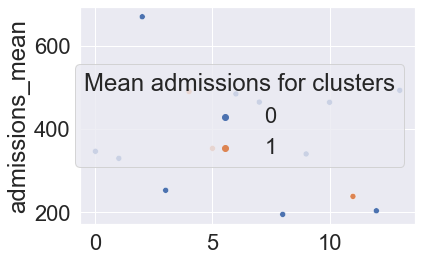

In [57]:
import seaborn as sns
sns.scatterplot(data=df, x=df.index, y='admissions_mean', hue='cluster')
plt.legend(loc='top right', title='Mean admissions for clusters')